In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras # for machine learning models


#We import the required libraries for data exploration and visualization.

import matplotlib.pyplot as plt
import os
#Image processing and resizig
# import cv2 # Import issues for the environment space
# import imutils # Same 
import seaborn as sns
%matplotlib inline

# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("."))

# Any results you write to the current directory are saved as output.

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


['smiley.jpeg', '.DS_Store', 'smiley_resized.jpg', 'Project exploration.ipynb', 'sample.zip', 'Competition_On_NIH', 'Project_sample.zip', 'Project_sample', 'sample', '.ipynb_checkpoints', 'rotatingImages.py']


In [3]:
PATH_TO_SAMPLES = 'sample/images/'
PATH_TO_META_SAMPLES = 'sample/updated_rotated_samples.csv'

In [4]:
data = pd.read_csv(PATH_TO_META_SAMPLES)
data.head()

,image_index,patient_age,view_position,originalimagewidth,originalimageheight,rotations,labels
0,00000013_005.png,60,AP,3056,2544,0,AP-0
1,00000013_026.png,57,AP,2500,2048,0,AP-0
2,00000017_001.png,77,AP,2500,2048,0,AP-0
3,00000030_001.png,79,PA,2992,2991,0,PA-0
4,00000032_001.png,55,AP,2500,2048,0,AP-0


In [5]:
data['labels'].unique()

array(['AP-0', 'PA-0', 'AP-90', 'PA-90', 'AP-180', 'PA-180', 'PA-270',
       'AP-270'], dtype=object)

### visualising some of the inputs label

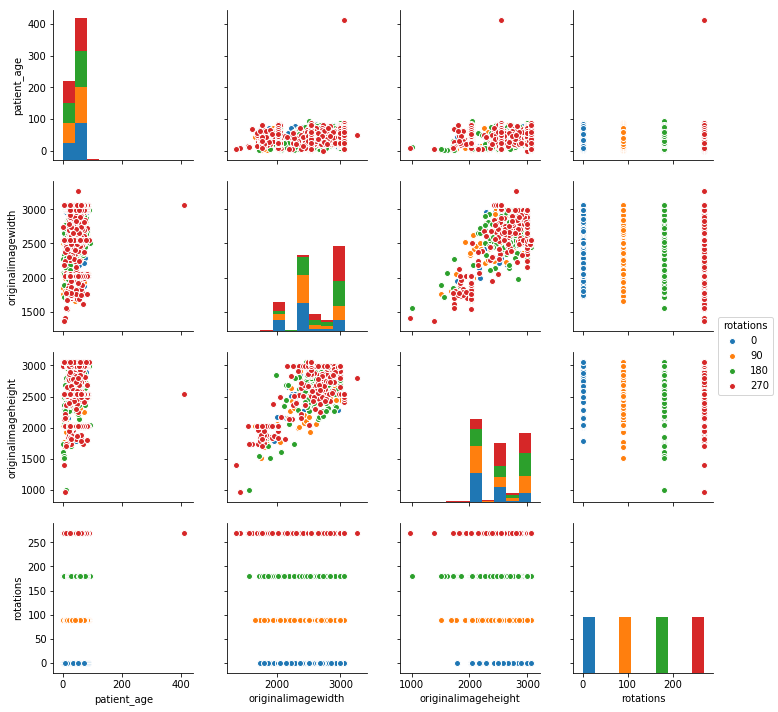

In [6]:
sns.pairplot(data=data[data.columns[1:7]], hue='rotations')
plt.show()
# No apperant data relationship here and so we move to plotting the Keras framework

Text(0,0.5,'Count')

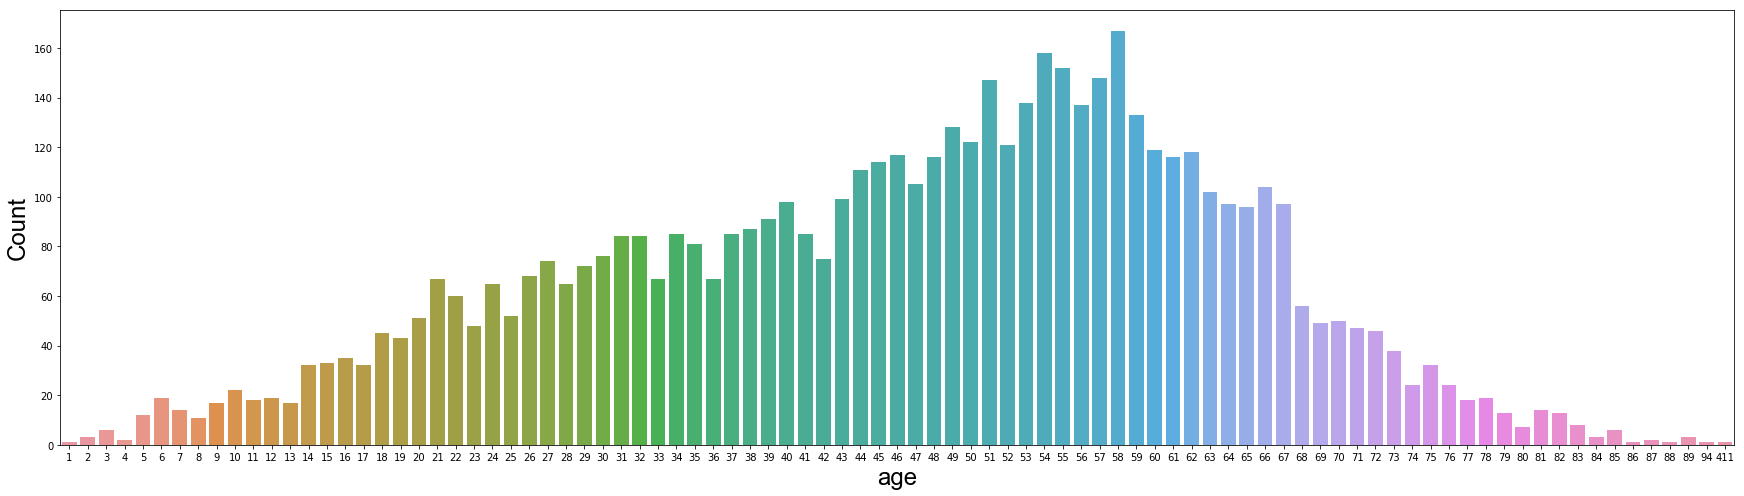

In [7]:
# distribution of the target age

ax = plt.figure(figsize=(30, 8))
sns.countplot(data.patient_age)
axis_font = {'fontname':'Arial', 'size':'24'}
plt.xlabel('age',  **axis_font)
plt.ylabel('Count',  **axis_font)

Text(0,0.5,'Count')

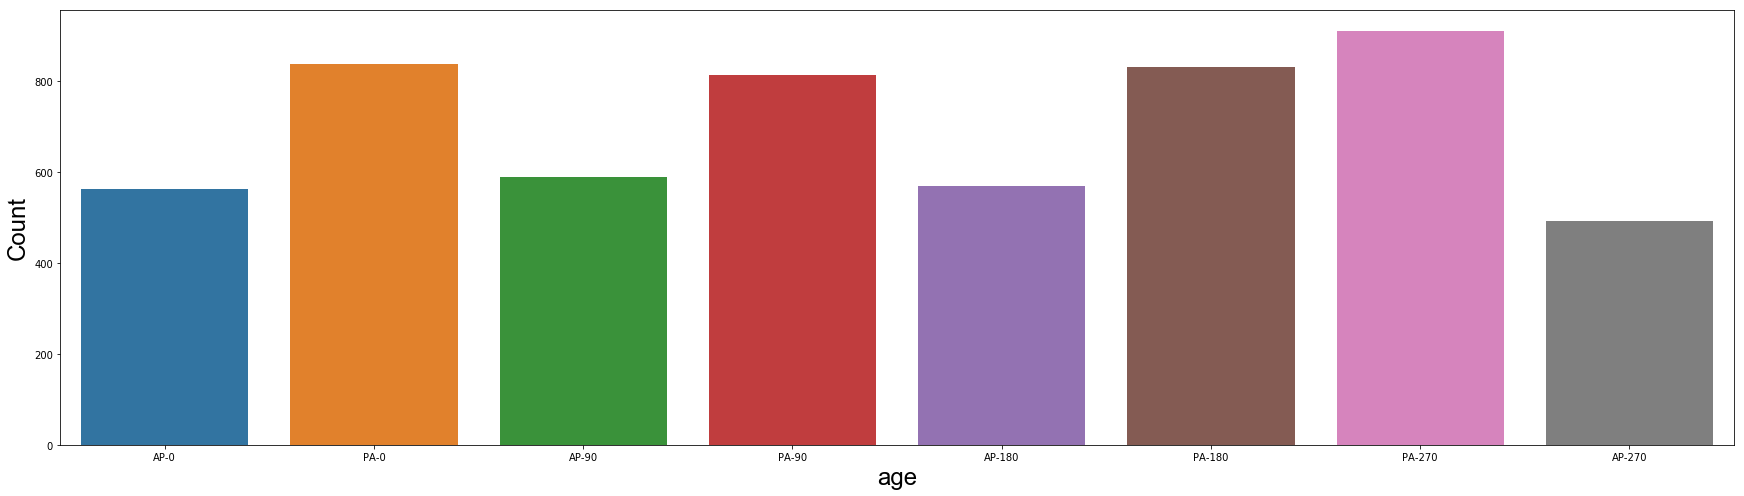

In [8]:
# distribution of the target labels

ax = plt.figure(figsize=(30, 8))
sns.countplot(data.labels)
axis_font = {'fontname':'Arial', 'size':'24'}
plt.xlabel('age',  **axis_font)
plt.ylabel('Count',  **axis_font)

### Pre processing of the images to fit the required model

In [9]:
data.head()

,image_index,patient_age,view_position,originalimagewidth,originalimageheight,rotations,labels
0,00000013_005.png,60,AP,3056,2544,0,AP-0
1,00000013_026.png,57,AP,2500,2048,0,AP-0
2,00000017_001.png,77,AP,2500,2048,0,AP-0
3,00000030_001.png,79,PA,2992,2991,0,PA-0
4,00000032_001.png,55,AP,2500,2048,0,AP-0


In [10]:
from keras_preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(rescale=1./255)
# Keras input shape for inceptionV3 model
input_shape = (299, 299, 3)
train_generator=datagen.flow_from_dataframe(dataframe=data, directory=PATH_TO_SAMPLES, x_col="image_index", y_col="labels", has_ext=True, class_mode="categorical", target_size=(299,299), batch_size=32)

Found 5606 images belonging to 8 classes.


#### TODO : fix validation set to be seperate from the training data

In [11]:
datagen=ImageDataGenerator(rescale=1./255)
# Keras input shape for inceptionV3 model
input_shape = (299, 299, 3)
valid_generator=datagen.flow_from_dataframe(dataframe=data, directory=PATH_TO_SAMPLES, x_col="image_index", y_col="labels", has_ext=True, class_mode="categorical", target_size=(299,299), batch_size=32)

Found 5606 images belonging to 8 classes.


In [12]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img
img = load_img('sample/images/00000013_026.png')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (300, 300, 3)
np.shape(x)

(299, 299, 3)

#### Loading the model from our previous session

In [17]:
os.listdir("sample/") 

['my_model_V1.h5',
 '.DS_Store',
 'images',
 'sample.zip',
 'images_copy',
 'updated_rotated_samples.csv',
 'rotated_sample.csv',
 'images rotated_copy',
 'my_model.h5',
 'Creating_rotated_images.ipynb',
 '.ipynb_checkpoints',
 'sample_labels.csv']

In [18]:
from keras.models import load_model
model = load_model('sample/my_model.h5')
new_model = load_model('sample/my_model_V1.h5')

/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


#### Tweaking the model to the required shpae for multiclass, classification

#### Compiling the model

In [14]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
nClasses= data.labels.unique()
print(len(nClasses))

8


### Using Seuential to build model from pre defined option

In [26]:
#Using Sequiential to build an appropriate model
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
base_model = model
nClasses= len(data.labels.unique())
new_model = Sequential()
new_model.add(base_model)
new_model.add(layers.Flatten())
new_model.add(layers.Dense(1024, activation='relu'))
new_model.add(layers.Dropout(0.5))
new_model.add(Dense(nClasses, activation='softmax'))

In [19]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 8, 8, 2048)        21802784  
_________________________________________________________________
flatten_2 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              134218752 
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 8200      
Total params: 156,029,736
Trainable params: 155,995,304
Non-trainable params: 34,432
_________________________________________________________________


In [28]:
new_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

##### Some of the actual code to train the model

In [21]:
from keras.callbacks import TensorBoard
from time import time
# Code I should use to train the model on the relevant data, or somehting similar.
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size

tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
history = new_model.fit_generator(generator=train_generator,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    steps_per_epoch = 2)

Epoch 1/1
2/2 [==============================] - 845s 423s/step - loss: 13.8515 - acc: 0.1406 - val_loss: 13.3198 - val_acc: 0.1729


In [22]:
history.history

{'val_loss': [13.319785374232701],
 'val_acc': [0.17285714285714285],
 'loss': [13.85148811340332],
 'acc': [0.140625]}

#### Smapling the model effectiveness 

In [24]:
#Choose an index form the data
index = 3400

In [26]:
data[index:index+2]

,image_index,patient_age,view_position,originalimagewidth,originalimageheight,rotations,labels
3400,00016778_039.png,27,AP,3056,2544,180,AP-180
3401,00016784_002.png,30,AP,2500,2048,180,AP-180


In [25]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
IMAGES_PATH = 'sample/images/'
sample = data.image_index[index]
FULL_PATH = IMAGES_PATH + sample

print("[INFO] loading and preprocessing image...")
# dimensions of our images
img_width, img_height = 299, 299
# predicting images
img = image.load_img(FULL_PATH, target_size=(img_width, img_height))
x = image.img_to_array(img)
# important! otherwise the predictions will be '0'  
x = x / 255  
x = np.expand_dims(x, axis=0)

# get the bottleneck prediction from the new_model
bottleneck_prediction = new_model.predict(x)  

#Fetching the relevant result from the prediction of the data
ID = np.argmax(bottleneck_prediction[0])
# Dictionary object of the generator labels
class_dictionary = train_generator.class_indices  
inv_map = {v: k for k, v in class_dictionary.items()}
label = inv_map[ID]
print("Image ID: {}, label from data : {}".format(data.image_index[index], data.labels[index]))
print("Image ID: {}, prediciton: {} ,Predicted Label: {}".format(data.image_index[index], bottleneck_prediction[0],label))

[INFO] loading and preprocessing image...
Image ID: 00016778_039.png, label from data : AP-180
Image ID: 00016778_039.png, prediciton: [0. 0. 1. 0. 0. 0. 0. 0.] ,Predicted Label: AP-90


#### Visualising satistics for the training phase

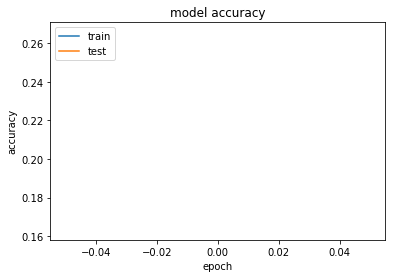

In [158]:
#Printing the relevant values for the acccuracy over time
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### TODO : fix and find there is missing values for accuracy, loss..etc

In [58]:
history.history

{'val_loss': [13.303119418866583],
 'val_acc': [0.17384284177068574],
 'loss': [12.529300808906555],
 'acc': [0.22265625]}

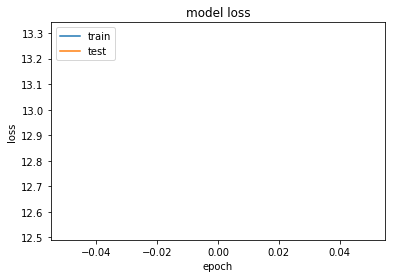

In [49]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Saving this new working model

In [159]:
# For future changes
from keras.models import load_model
new_model.save('sample/my_model_V1.h5')  # creates a HDF5 file 'my_model_V1.h5'

### Loading Model and getting some prediction

In [24]:
model = keras.applications.inception_v3.InceptionV3(include_top=False, weights='imagenet', input_tensor=None, input_shape=(299, 299, 3)
, pooling=None, classes=8)

In [45]:
# For future changes
from keras.models import load_model
model.save('sample/my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('sample/my_model.h5')

/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


#### Some utility calls I might have used before

In [37]:
import ctypes
a = "hello world"
print(ctypes.cast(id(a), ctypes.py_object).value)

hello world


In [41]:
import gc
def objects_by_id(id_):
    for obj in gc.get_objects():
        if id(obj) == id_:
            return obj
    raise Exception("No found")

In [ ]:
data.columns = [c.lower().replace(' ', '_') for c in data.columns]
data.head(20)

In [4]:
data = pd.read_csv(PATH_TO_META_SAMPLES)
data['patient_age'] = [int(str_age.strip('YMD')) for str_age in data['patient_age']]

In [13]:
n = len(data['image_index'])
labels = []
for index, row in data.iterrows():
    temp = row['view_position'] + "-" + str(row['rotations'])
    labels.append(temp)

In [20]:
data.to_csv('sample/updated_rotated_samples.csv', index=False)